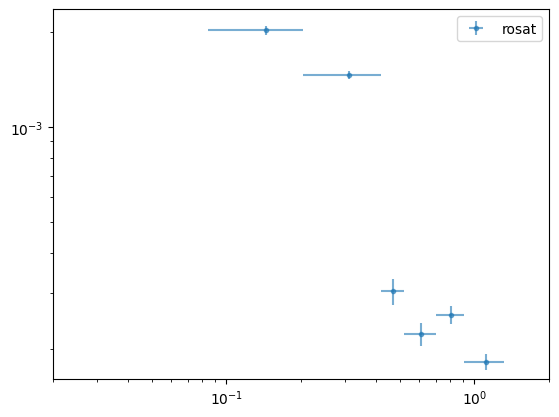

In [60]:
# rosat data 
import numpy as np
import matplotlib.pyplot as plt
workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/bkg3_r500'
f = open(f'{workpath}/rosat_data.qdp')
lines = f.readlines()

data_num = 1

data_cube = np.zeros((data_num,1000,4))
n = 0
sub_cube = data_cube[n]
for i in range(3,len(lines)):
    if 'NO' in lines[i]:
        n += 1
        sub_cube = data_cube[n]
    else:
        sub_cube[i] = np.array(lines[i].split(' '), dtype=float)
        
plt.xscale('log')
plt.yscale('log')
for i in range(len(data_cube)):
    plt.errorbar(data_cube[i,:,0], data_cube[i,:,2], xerr = data_cube[i,:,1], yerr = data_cube[i,:,3], fmt='.', label = 'rosat',  alpha = 0.6)
plt.xlim(0.02,2)
plt.legend()

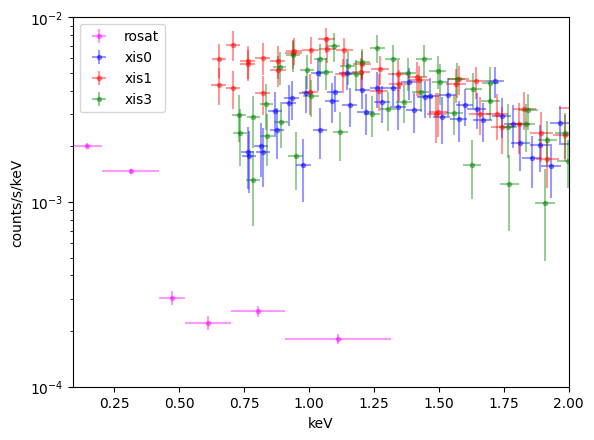

In [97]:
# suzaku data 
import numpy as np
import matplotlib.pyplot as plt

# read data
workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/bkg3_r500'
data_dir = {}
f = open(f'{workpath}/bkg3_suzaku.qdp')
data_dir['suzaku'] = f.readlines()
f.close()
f = open(f'{workpath}/rosat_data.qdp')
data_dir['rosat'] = f.readlines()
f.close()
f = open(f'{workpath}/werner_fit_mdl.qdp')
data_dir['fit_sum_mdl'] = f.readlines()
f.close()

fig, ax = plt.subplots()
def plot_qdp_specdata(data, data_num):
    data_cube = np.zeros((data_num,1000,4))
    n = 0
    sub_cube = data_cube[n]
    for i in range(3,len(data)):
        if 'NO' in data[i]:
            n += 1
            sub_cube = data_cube[n]
        else:
            sub_cube[i] = np.array(data[i].split(' '), dtype=float)
    return data_cube


data_cube = plot_qdp_specdata(data_dir['rosat'], 1, )

data_lab = ['rosat']
data_color = ['magenta']
for i in range(len(data_cube)):
    ax.errorbar(data_cube[i,:,0], data_cube[i,:,2], xerr = data_cube[i,:,1], yerr = data_cube[i,:,3], fmt='.', label = data_lab[i], color = data_color[i], alpha = 0.4)
data_lab = ['xis0','xis1','xis3']
data_color = ['b','r','g']
data_cube = plot_qdp_specdata( data_dir['suzaku'], 6, )
for i in range(3):
# i = 1
    ax.errorbar(data_cube[i,:,0], data_cube[i,:,2], xerr = data_cube[i,:,1], yerr = data_cube[i,:,3], fmt='.', label = data_lab[i], color = data_color[i], alpha = 0.4)
    ax.errorbar(data_cube[i+3,:,0], data_cube[i+3,:,2], xerr = data_cube[i+3,:,1], yerr = data_cube[i+3,:,3], fmt='.', color = data_color[i], alpha = 0.4)

# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.09,2)
ax.set_ylim(1e-4,1e-2)
ax.set_xlabel('keV')
ax.set_ylabel('counts/s/keV')
plt.legend()
plt.show()


(14, 19, 12)


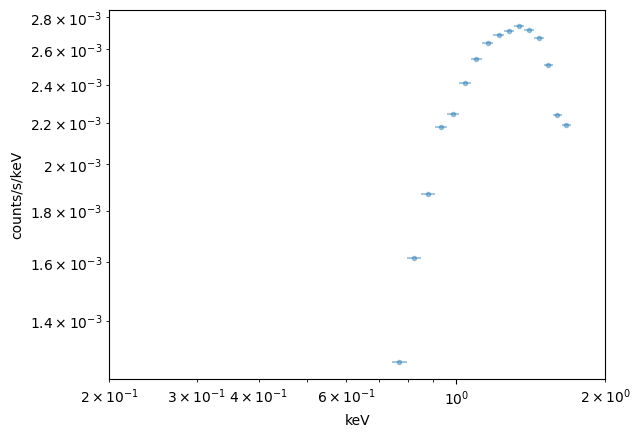

In [148]:
# suzaku data 
import numpy as np
import matplotlib.pyplot as plt

def plot_qdp_specdata(data, data_num):
    point_num = int(len(data)/data_num/2)+1
    data_cube = np.zeros((data_num*2,point_num,12))
    n = 0
    sub_cube = data_cube[n]
    for i in range(3,point_num):
        if 'NO NO NO NO NO NO NO NO NO NO NO NO\n' in data[i]:
            n += 1
            sub_cube = data_cube[n]
        elif "NO NO NO NO NO NO NO NO" in data[i]:
            break
            # sub_cube[i][0:4] = np.array(data[i].split(' ')[0:4],dtype=float)
        else:
            sub_cube[i] = np.array(data[i].split(' '), dtype=float)
    return data_cube

# read data
workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/bkg3_r500'
data_dir = {}
f = open(f'{workpath}/bkg_nowerner.qdp')
data_dir['fit_sum_mdl'] = f.readlines()
f.close()
fig, ax = plt.subplots()
data_cube = plot_qdp_specdata(data_dir['fit_sum_mdl'], 7, )
print(data_cube.shape)
for i in range(len(data_cube)):
    ax.errorbar(data_cube[i,:,0], data_cube[i,:,6], xerr = data_cube[i,:,1], fmt='.', alpha = 0.4)
# for i in range(1):
# ax.errorbar(data_cube[i,:,0], data_cube[i,:,2], xerr = data_cube[i,:,1],yerr = data_cube[i,:,3], fmt='.',  alpha = 0.4)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.2,2)
# ax.set_ylim(1e-4,1e-2)
ax.set_xlabel('keV')
ax.set_ylabel('counts/s/keV')
# plt.legend()
plt.show()

In [350]:
def basic_figure_style():
    SMALL_SIZE = 6 * 2
    MEDIUM_SIZE = 8 * 2
    BIGGER_SIZE = 10 * 2

    plt.rc("font", size=MEDIUM_SIZE, family="serif")  # controls default text sizes
    plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
    plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
    plt.rc("xtick", labelsize=SMALL_SIZE, direction="in")  # fontsize of the tick labels
    plt.rc("ytick", labelsize=SMALL_SIZE, direction="in")  # fontsize of the tick labels
    plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
    plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc("lines", linewidth=2)
    plt.rc("axes", grid=True)  #
    plt.rc("grid", alpha=0.7)  #
    plt.rc("xtick", top=True)
    plt.rc("ytick", right=True)
    plt.rc("axes.formatter", use_mathtext=True, min_exponent=4, useoffset=False)

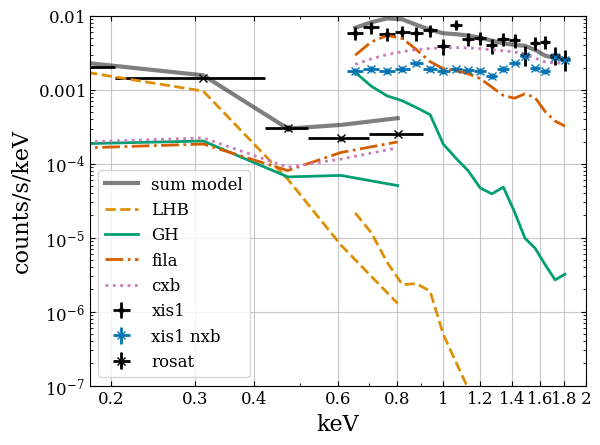

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

basic_figure_style()
workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/bkg3_r500'
savepath = f'/Users/eusracenorth/Documents/suzaku_A222-223/code/my_code/bin/eps'
os.makedirs(savepath, exist_ok=True)
df = pd.read_csv(f'{workpath}/bkg_wernerfit.qdp', delimiter = ' ')

dat = df.to_numpy()
dat1 = np.where(dat=='NO', 0, dat)
dat1 = np.array(dat1, dtype=float)
idx_arr = [1]
for i in range(len(dat1)):
    if np.sum(dat1[i])==0:
        idx_arr.append(i)
idx_arr = np.array(idx_arr)-1
# plot top panel
fig,ax = plt.subplots()
c = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']
# colors = ['k','r','g', 'k','r','g', 'magenta']
colors = [c[0],c[1],c[2],c[0],c[1],c[2],c[-1]]
'''
j=0: nxb 
j=1: nxb err
j=2: sum model
j=3: LHB apec
j=4: GH tbabs*apec
j=5: fila tbabs*apec
j=6: tbabs*pow
fila apec j=3 or 6
cxb j=5 or 8?
'''

######### suzaku ##########
# with labels
# for i in range(1):
i= 1
# plot data
ax.errorbar(dat1[idx_arr[i]+2:idx_arr[i+1],0], dat1[idx_arr[i]+2:idx_arr[i+1],2], xerr = dat1[idx_arr[i]+2:idx_arr[i+1],1], yerr = dat1[idx_arr[i]+2:idx_arr[i+1],3], fmt='.', color = 'k', alpha = 1, label = f'xis{i}')
# plot nxb, j=0,1
j = 0
nxb = np.array(dat1[idx_arr[i]+2:idx_arr[i+1],4+j])
nxberr = np.array(dat1[idx_arr[i]+2:idx_arr[i+1],4+j+1])
ax.errorbar(dat1[idx_arr[i]+2:idx_arr[i+1],0],nxb, xerr = dat1[idx_arr[i]+2:idx_arr[i+1],1],yerr = nxberr,  color = colors[0], alpha = 1, fmt='x', label = f'xis{i} nxb')
j = 2
ax.plot(dat1[idx_arr[i]+2:idx_arr[i+1],0], np.array(dat1[idx_arr[i]+2:idx_arr[i+1],4+j]),  color = 'k', alpha = 0.5, linewidth=3)
j = 3
ax.plot(dat1[idx_arr[i]+2:idx_arr[i+1],0], np.array(dat1[idx_arr[i]+2:idx_arr[i+1],4+j]), color = c[1], alpha = 1, linewidth=2, linestyle = '--')
j = 4
ax.plot(dat1[idx_arr[i]+2:idx_arr[i+1],0], np.array(dat1[idx_arr[i]+2:idx_arr[i+1],4+j]), color = c[2], alpha = 1, linewidth=2, linestyle = '-')
j = 5
ax.plot(dat1[idx_arr[i]+2:idx_arr[i+1],0], np.array(dat1[idx_arr[i]+2:idx_arr[i+1],4+j]), color = c[3], alpha = 1, linewidth=2, linestyle = '-.')
j = 6
ax.plot(dat1[idx_arr[i]+2:idx_arr[i+1],0], np.array(dat1[idx_arr[i]+2:idx_arr[i+1],4+j]), color = c[4], alpha = 1, linewidth=2, linestyle = ':')
########### rosat #############
i = 6
# plot data
ax.errorbar(dat1[idx_arr[i]+2:idx_arr[i+1],0], dat1[idx_arr[i]+2:idx_arr[i+1],2], xerr = dat1[idx_arr[i]+2:idx_arr[i+1],1], yerr = dat1[idx_arr[i]+2:idx_arr[i+1],3], fmt='x', color = 'k', alpha = 1, label = f'rosat')
j = 2
ax.plot(dat1[idx_arr[i]+2:idx_arr[i+1],0], np.array(dat1[idx_arr[i]+2:idx_arr[i+1],4+j]),  color = 'k', alpha = 0.5, linewidth=3, label = 'sum model')
j = 3
ax.plot(dat1[idx_arr[i]+2:idx_arr[i+1],0], np.array(dat1[idx_arr[i]+2:idx_arr[i+1],4+j]), color = c[1], alpha = 1, linewidth=2, linestyle = '--', label = 'LHB')
j = 4
ax.plot(dat1[idx_arr[i]+2:idx_arr[i+1],0], np.array(dat1[idx_arr[i]+2:idx_arr[i+1],4+j]), color = c[2], alpha = 1, linewidth=2, linestyle = '-', label = 'GH')
j = 5
ax.plot(dat1[idx_arr[i]+2:idx_arr[i+1],0], np.array(dat1[idx_arr[i]+2:idx_arr[i+1],4+j]), color = c[3], alpha = 1, linewidth=2, linestyle = '-.', label = 'fila')
j = 6
ax.plot(dat1[idx_arr[i]+2:idx_arr[i+1],0], np.array(dat1[idx_arr[i]+2:idx_arr[i+1],4+j]), color = c[4], alpha = 1, linewidth=2, linestyle = ':', label = 'cxb')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.18,2)
ax.set_ylim(1e-7,1e-2)
ax.set_xlabel('keV')
ax.set_ylabel('counts/s/keV')
ax.set_xticks([0.2,0.3,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8, 2], ['0.2','0.3','0.4','0.6','0.8','1','1.2','1.4','1.6','1.8', '2'])
plt.legend()
# plt.show()
# print(dat1[120])
plt.savefig(f'{savepath}/spec_bgfit.pdf', dpi=300)
# plt.savefig(f'{savepath}/spec_bgfit.png')

In [334]:
print(sns.color_palette('colorblind').as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


In [339]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]